# Revisão de código 

Olá! 

Meu nome é Suelen. Estou feliz em revisar seu projeto hoje!

Quando vejo um erro pela primeira vez, apenas aponto. Deixarei você encontrá-lo e corrigi-lo sozinho. Além disso, ao longo do texto, farei algumas observações sobre melhorias no código e também farei comentários sobre suas percepções sobre o assunto. Mas se você ainda não consegue lidar com essa tarefa, darei uma dica mais precisa na próxima iteração e também alguns exemplos práticos. Estarei aberto a feedbacks e discussões sobre o tema.

Você pode encontrar meus comentários em caixas verdes, amarelas ou vermelhas como estas:


<div class="alert alert-block alert-success">
<b>Comentário: </b> <a class="tocSkip"></a>

Sucesso. Tudo está correto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentário: </b> <a class="tocSkip"></a>

Observações. Algumas recomendações.
</div>

<div class="alert alert-block alert-danger">

<b>Comentário: </b> <a class="tocSkip"></a>

O bloco requer algumas correções. O trabalho não pode ser aceito com os comentários vermelhos.
</div>

Você pode me responder usando isto:

<div class="alert alert-block alert-info">
<b>Resposta do aluno.  
    </b> <a class="tocSkip"></a>
</div>



<div class="alert alert-block alert-success">

<b>Comentário geral: </b> <a class="tocSkip"></a>

Parabéns pelo excelente desenvolvimento do código, Georgia! 🎉 Seu projeto está com uma qualidade excepcional. É perceptível que você domina os conceitos de ciência de dados.

Adicionei apenas alguns comentários com sugestões e dicas para te ajudar a brilhar ainda mais.
Continue com esse trabalho incrível! 🔆 

</div>

# Fique um pouco mais

## Objetivo

Desenvolver um modelo de machine learning para o banco *BetaBank* com o maior F1-score possível, que possa analisar o comportamento dos clientes para prever quando algum deles tiver grandes chances de deixar o banco.

- **F1-score mínimo para o conjunto de dados de testes: 0,56**

## Analisando os dados

### Importando biliotecas e dados

In [40]:
import warnings
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.exceptions import ConvergenceWarning
from sklearn.utils import shuffle

In [2]:
df = pd.read_csv('/datasets/Churn.csv')

### Entendendo o conjunto de dados

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [4]:
df.sample(5, random_state=3333)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
3819,3820,15718289,Bradley,553,Germany,Male,46,3.0,82291.10,1,1,0,112549.99,1
2986,2987,15768816,Shen,570,Germany,Male,42,0.0,107856.57,2,1,0,127528.84,0
2260,2261,15623927,Alexander,576,France,Male,55,9.0,0.00,2,1,1,94450.97,0
8704,8705,15777586,Moss,784,Spain,Female,42,2.0,109052.04,2,1,0,6409.55,0
1783,1784,15693381,Tipton,533,Spain,Male,38,1.0,135289.33,2,0,1,152956.33,0


O DataFrame possui dados bancários dos clientes em seu período de relacionamento com o banco contendo os seguintes dados:

- `RowNumber`: Números dos índices das strings de dados *(não parece acrescentar informações relevantes aos dados, já temos os próprios índices do DataFrame)*;
- `CustomerId`: Identificador exclusivo do cliente *(sem valores nulos, deve ser convertido para String por ser uma variável categórica e para não ser confundido com medidas de grandeza pelo modelo)*;
- `Surname`: Sobrenome do cliente *(não possui valores nulos, é mais útil para identificar o cliente após as previsões do que para o próprio cálculo das previsões)*;
- `CreditScore`: Pontuação de crédito *(não possui valores nulos, é uma importante medida de grandeza)*;
- `Geography`: País de residência *(não possui valores nulos, variável categórica de possível relevância)*;
- `Gender`: Gênero do cliente *(não possui valores nulos, variável categórica)*;
- `Age`: Idade do cliente *(não possui valores nulos, variável numérica)*;
- `Tenure`: Período de maturação para o depósito fixo de um cliente - *em anos (possui valores ausentes que precisarão ser substituídos)*;
- `Balance`: Saldo atual da conta - *ou no momento de rescisão de contrato (não possui valores nulos, também é uma importante medida de grandeza)*;
- `NumOfProducts`: Número de produtos bancários usados pelo cliente *(não possui valores nulos, variável numérica)*;
- `HasCrCard`: Se o cliente possui cartão de crédito - *1 = sim, 0 = não (não possui valores nulos, variável binária)*;
- `IsActiveMember`: Se o cliente é ativo no banco ou não - *1 = sim, 0 = não (não possui valores nulos, variável binária)*;
- `EstimatedSalary`: Salário estimado *(não possui valores nulos, outra importante medida de grandeza)*;
- `Exited`: **Variável objetivo** - Contrato encerrado ou não - *1 = sim; 0 = não (não possui valores nulos, variável binária)*.

In [5]:
# Conferindo se não há dados duplicados.
df[df.duplicated()]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


O DataFrame não possui dados duplicados.

### Entendendo as variáveis quantitativas

In [6]:
# Conferindo a amplitude de CreditScore.
df['CreditScore'].describe()

count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: CreditScore, dtype: float64

Os valores de `CreditScore` variam entre 350 e 850, com distribuição próxima da Normal.

In [7]:
# Conferindo amplitude de Age.
df['Age'].describe()

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: Age, dtype: float64

Os valores de `Age` variam entre 18 e 92 anos com 50% dos clientes variando entre 32 e 44 anos.

In [8]:
# Conferindo amplitude de Tenure.
df['Tenure'].describe()

count    9091.000000
mean        4.997690
std         2.894723
min         0.000000
25%         2.000000
50%         5.000000
75%         7.000000
max        10.000000
Name: Tenure, dtype: float64

`Tenure` varia entre 0 e 10 anos de aplicação.

In [9]:
# Conferindo amplitude de Balance.
df['Balance'].describe()

count     10000.000000
mean      76485.889288
std       62397.405202
min           0.000000
25%           0.000000
50%       97198.540000
75%      127644.240000
max      250898.090000
Name: Balance, dtype: float64

`Balance` varia de 0 a 250.898,09 dólares como saldo da conta, sendo todo o primeiro quartil de clientes com o saldo zerado.

In [10]:
# Conferindo amplitude de EstimatedSalary.
df['EstimatedSalary'].describe()

count     10000.000000
mean     100090.239881
std       57510.492818
min          11.580000
25%       51002.110000
50%      100193.915000
75%      149388.247500
max      199992.480000
Name: EstimatedSalary, dtype: float64

O `EstimatedSalary` varia entre 11,58 e 199.992,48 dólares.

Inicialmente não há necessidade de padronizar as escalas, uma vez que não sabemos quais delas são mais relevantes para as previsões ou mesmo se todas seriam igualmente relevantes ou não.

## Preparando os dados

In [11]:
# Apagando a coluna RowNumber
df_prepared = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [12]:
# Preenchendo os valores nulos de Tenure
df_prepared['Tenure'].fillna(5, inplace=True)

Escolhi preencher os valores nulos de `Tenure` com a mediana, que é de 5 anos.

<div class="alert alert-block alert-success">

<b>Comentário: </b> <a class="tocSkip"></a>

Perfeito tratamento dos dados nulos com a mediana. Caso se interesse pelo assunto de imputação para dados nulos, recomendo a leitura: https://www.datacamp.com/tutorial/techniques-to-handle-missing-data-values Aborda técnicas mais avançadas de imputação de dados muito interessantes. 
</div>

In [13]:
# Fazendo a Codificação de Rótulos em todo o dataframe, exceto em Gender.
gender_column = df_prepared['Gender']

encoder = OrdinalEncoder()
df_encoded = pd.DataFrame(
    encoder.fit_transform(
        df_prepared.drop(columns=['Gender'])
        ),
        columns=df_prepared.drop(columns=['Gender']).columns
    )

df_encoded['Gender'] = gender_column.values

In [14]:
# Fazendo OHE na coluna Gender.
df_encoded = pd.get_dummies(df_encoded, columns=['Gender'], drop_first=True)

## Examinando o Equilíbrio das Classes:

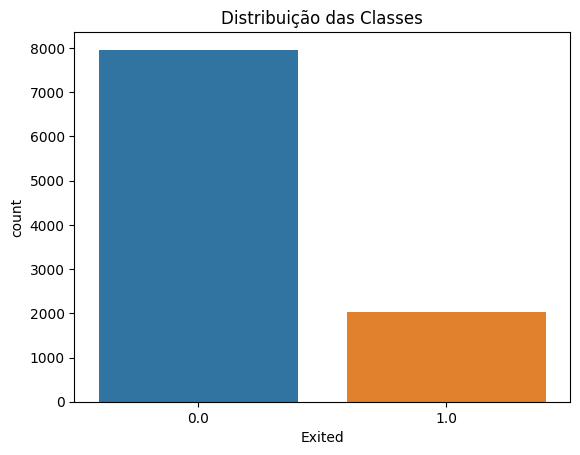

In [15]:
sns.countplot(x='Exited', data=df_encoded)
plt.title('Distribuição das Classes')
plt.show()

<div class="alert alert-block alert-success">

<b>Comentário: </b> <a class="tocSkip"></a>

Bom trabalho identificando o problema de desbalanceamento de classes! Caso queira analisar as proporções dos grupos, você pode utilizar o argumento `normalize=True` dentro do value_counts(). Exemplo:
    
```python
df_encoded['exit'].value_counts(normalize=True)
```

</div>

Há um grande desequilíbro entre as classes-objetivo, proporção de aproximadamente 4:1, o que pode prejudicar a eficácia do modelo.

## Dividindo os dados

Como este é o único conjunto de dados que temos, vamos dividí-lo na proporção 3:1:1 *(60% vai para o conjunto de treinamento, 20% para o conjunto de validação e 20% para o conjunto de testes)*.

In [16]:
# Dividindo o conjunto de treinamento do de validação+teste.
train, valid_test = train_test_split(df_encoded, test_size=0.4, random_state=3333)

In [17]:
# Dividindo o subconjunto valid_test em 'valid' e 'test'
valid, test = train_test_split(valid_test, test_size=0.5, random_state=3333)

## Criando variáveis 'features' e 'target

In [18]:
# Conjunto de treinamento.
features = train.drop(['Exited'], axis=1)
target = train['Exited']

In [19]:
# Conjunto de validação.
features_valid = valid.drop(['Exited'], axis=1)
target_valid = valid['Exited']

In [20]:
# Conjunto de testes.
features_test = test.drop(['Exited'], axis=1)
target_test = test['Exited']

## Treinando um modelo sem levar em conta o desequilíbrio das classes

### Treinando uma Árvore de Classificação

In [21]:
best_score = 0
best_criterion = ""
best_depth = 0
best_samples_split = 0
best_samples_leaf = 0
for criterion in ['gini', 'entropy']:
    for depth in range(1,11):
        for sample_split in range(2,12):
            for sample_leaf in range(2,12):
                model = DecisionTreeClassifier(
                    criterion=criterion,
                    max_depth=depth,
                    min_samples_split=sample_split,
                    min_samples_leaf=sample_leaf,
                    random_state=3333
                )
                model.fit(features, target)
                train_predict = model.predict(features)
                train_score = f1_score(target, train_predict)
                valid_predict = model.predict(features_valid)
                valid_score = f1_score(target_valid, valid_predict)
                if valid_score > best_score:
                    best_score = valid_score
                    best_criterion = criterion
                    best_depth = depth
                    best_samples_split = sample_split
                    best_samples_leaf = sample_leaf
                    
print('F1 Score do melhor modelo no conjunto de treinamento:', train_score)
print(f'''F1 Score do melhor modelo no conjunto de validação: {best_score}, hiperparâmetros:
criterion = {best_criterion},
max_depth = {best_depth},
min_samples_split = {best_samples_split},
min_samples_leaf = {best_samples_leaf}''')

F1 Score do melhor modelo no conjunto de treinamento: 0.6719552029864675
F1 Score do melhor modelo no conjunto de validação: 0.558904109589041, hiperparâmetros:
criterion = gini,
max_depth = 8,
min_samples_split = 11,
min_samples_leaf = 2


### Treinando uma Floresta Aleatória:

In [22]:
forest_best_est = 0
forest_best_score = 0
forest_best_criterion = ''
forest_best_depth = 0
forest_best_samples_split = 0
forest_best_samples_leaf = 0
for est in range(9,18):
    for criterion in ['gini', 'entropy']:
        for depth in range(6,12):
            for sample_split in range(2,5):
                for sample_leaf in range(2,5):
                    model = RandomForestClassifier(
                        n_estimators=est,
                        criterion=criterion,
                        max_depth=depth,
                        min_samples_split=sample_split,
                        min_samples_leaf=sample_leaf,
                        random_state=3333
                    )
                    model.fit(features, target)
                    train_predict = model.predict(features)
                    train_score = f1_score(target, train_predict)
                    valid_predict = model.predict(features_valid)
                    valid_score = f1_score(target_valid, valid_predict)
                    if valid_score > forest_best_score:
                        forest_best_score = valid_score
                        forest_best_est = est
                        forest_best_criterion = criterion
                        forest_best_depth = depth
                        forest_best_samples_split = sample_split
                        forest_best_samples_leaf = sample_leaf
                        
print('F1 Score do melhor modelo no conjunto de treinamento:', train_score)
print(f'''F1 Score do melhor modelo no conjunto de validação: {forest_best_score}, hiperparâmetros:
n_estimators = {forest_best_est},
criterion = {forest_best_criterion},
max_depth = {forest_best_depth},
min_samples_split = {forest_best_samples_split},
min_samples_leaf = {forest_best_samples_leaf}''')

F1 Score do melhor modelo no conjunto de treinamento: 0.6803488968701897
F1 Score do melhor modelo no conjunto de validação: 0.5705794947994056, hiperparâmetros:
n_estimators = 17,
criterion = entropy,
max_depth = 11,
min_samples_split = 2,
min_samples_leaf = 3


### Treinando Regressão Logística:

In [23]:
warnings.filterwarnings('ignore', category=ConvergenceWarning)

log_best_score = 0
log_best_solver = ''
for solver in ['lbfgs','liblinear','newton-cg','sag','saga']:
    model = LogisticRegression(
        solver=solver,
        random_state=3333
    )
    model.fit(features, target)
    train_predict = model.predict(features)
    train_score = f1_score(target, train_predict)
    valid_predict = model.predict(features_valid)
    valid_score = f1_score(target_valid, valid_predict)
    if valid_score > log_best_score:
        log_best_score = valid_score
        log_best_solver = solver
        
print('F1 Score do melhor modelo no conjunto de treinamento:', train_score)
print(f'''F1 Score do melhor modelo no conjunto de validação: {log_best_score}, hiperparâmetros:
solver = {log_best_solver}''')

F1 Score do melhor modelo no conjunto de treinamento: 0.00974817221770918
F1 Score do melhor modelo no conjunto de validação: 0.30088495575221236, hiperparâmetros:
solver = liblinear


Sem levar em conta o desequilíbrio de classes, o modelo de Floresta Aleatória (*F1 Score de 0.570*) teve um desempenho ligeiramente melhor que o de Árvore de Classificação (*F1 Score de 0.558*) e ambos tiveram desempenho melhor no conjunto de testes do que no de validação.

Já o modelo de Regressão Logística, apesar de ter tido o pior desempenho entre os modelos, teve melhor desempenho no conjunto de validação do que no de teste, com diferença significativa entre eles (*F1 Score de 0.003 vs 0.300*).

Nenhum dos modelos alcançou com o conjunto de validação o desempenho mínimo requerido (*0.590*).

## Corrigindo o Desequilíbrio de Classes

### Aplicando a Superamostragem

In [24]:
# Criando a função Upsample.
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones= features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled,
        target_upsampled,
        random_state=3333
    )
    
    return features_upsampled, target_upsampled

In [25]:
# Definindo variáveis upsampled.
features_upsampled, target_upsampled = upsample(features, target, 10)

### Aplicando a Subamostragem

In [26]:
# Criando a função Downsample.
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones= features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction)]
        + [features_ones]
    )
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction)]
        + [target_ones]
    )
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled,
        target_downsampled,
        random_state=3333
    )
    
    return features_downsampled, target_downsampled

In [27]:
# Definindo variáveis upsampled e downsampled.
features_balanced, target_balanced = downsample(features_upsampled, target_upsampled, 0.1)

In [28]:
# Definindo variáveis downsampled.
features_downsampled, target_downsampled = downsample(features, target, 0.1)

## Treinando novos modelos com as Classes equilibradas

### Árvore de Classificação

In [29]:
# Treinando novo modelo equilibrando o peso das classes.
best_score = 0
best_criterion = ""
best_depth = 0
best_samples_split = 0
best_samples_leaf = 0
for criterion in ['gini', 'entropy']:
    for depth in range(1,11):
        for sample_split in range(2,12):
            for sample_leaf in range(2,12):
                model = DecisionTreeClassifier(
                    criterion=criterion,
                    max_depth=depth,
                    min_samples_split=sample_split,
                    min_samples_leaf=sample_leaf,
                    class_weight='balanced',
                    random_state=3333
                )
                model.fit(features_balanced, target_balanced)
                train_predict = model.predict(features)
                train_score = f1_score(target, train_predict)
                valid_predict = model.predict(features_valid)
                valid_score = f1_score(target_valid, valid_predict)
                if valid_score > best_score:
                    best_score = valid_score
                    best_criterion = criterion
                    best_depth = depth
                    best_samples_split = sample_split
                    best_samples_leaf = sample_leaf
                    
print('F1 Score do melhor modelo no conjunto de treinamento:', train_score)
print(f'''F1 Score do melhor modelo no conjunto de validação: {best_score}, hiperparâmetros:
criterion = {best_criterion},
max_depth = {best_depth},
min_samples_split = {best_samples_split},
min_samples_leaf = {best_samples_leaf}''')

F1 Score do melhor modelo no conjunto de treinamento: 0.5642317380352644
F1 Score do melhor modelo no conjunto de validação: 0.5799180327868853, hiperparâmetros:
criterion = entropy,
max_depth = 4,
min_samples_split = 2,
min_samples_leaf = 2


O modelo de Árvore de Classificação teve ligeira melhora no F1 Score do conjunto de validação: de *0.558* para *0.579*, com hiperparâmetros finais de:

- `criterion` = 'entropy';
- `max_depth` = 4,
- `min_samples_split` = 2;
- `min_samples_leaf` = 2;
- `class_weight` = 'balanced'.

### Floresta Aleatória

In [30]:
# Treinando novo modelo equilibrando o peso das classes.
forest_best_est = 0
forest_best_score = 0
forest_best_criterion = ''
forest_best_depth = 0
forest_best_samples_split = 0
forest_best_samples_leaf = 0
for est in range(9,18):
    for criterion in ['gini', 'entropy']:
        for depth in range(6,12):
            for sample_split in range(2,5):
                for sample_leaf in range(2,5):
                    model = RandomForestClassifier(
                        n_estimators=est,
                        criterion=criterion,
                        max_depth=depth,
                        min_samples_split=sample_split,
                        min_samples_leaf=sample_leaf,
                        class_weight='balanced',
                        random_state=3333
                    )
                    model.fit(features_balanced, target_balanced)
                    train_predict = model.predict(features)
                    train_score = f1_score(target, train_predict)
                    valid_predict = model.predict(features_valid)
                    valid_score = f1_score(target_valid, valid_predict)
                    if valid_score > forest_best_score:
                        forest_best_score = valid_score
                        forest_best_est = est
                        forest_best_criterion = criterion
                        forest_best_depth = depth
                        forest_best_samples_split = sample_split
                        forest_best_samples_leaf = sample_leaf
                        
print('F1 Score do melhor modelo no conjunto de treinamento:', train_score)
print(f'''F1 Score do melhor modelo no conjunto de validação: {forest_best_score}, hiperparâmetros:
n_estimators = {forest_best_est},
criterion = {forest_best_criterion},
max_depth = {forest_best_depth},
min_samples_split = {forest_best_samples_split},
min_samples_leaf = {forest_best_samples_leaf}''')

F1 Score do melhor modelo no conjunto de treinamento: 0.5054713804713805
F1 Score do melhor modelo no conjunto de validação: 0.5705024311183144, hiperparâmetros:
n_estimators = 17,
criterion = entropy,
max_depth = 6,
min_samples_split = 2,
min_samples_leaf = 2


O modelo de Floresta Aleatória teve desempenho inferior ao de Árvore de Classificação, com F1 Score de *0.570*. Hiperparâmetros finais:

- `n_estimators` = 17,
- `criterion` = 'entropy';
- `max_depth` = 6,
- `min_samples_split` = 2;
- `min_samples_leaf` = 2,
- `class_weight` = 'balanced'.

### Regressão Logística

In [31]:
# Treinando novo modelo equilibrando o peso das classes.
warnings.filterwarnings('ignore', category=ConvergenceWarning)

log_best_score = 0
log_best_solver = ''
for solver in ['lbfgs','liblinear','newton-cg','sag','saga']:
    model = LogisticRegression(
        solver=solver,
        class_weight='balanced',
        random_state=3333
    )
    model.fit(features_balanced, target_balanced)
    train_predict = model.predict(features)
    train_score = f1_score(target, train_predict)
    valid_predict = model.predict(features_valid)
    valid_score = f1_score(target_valid, valid_predict)
    if valid_score > log_best_score:
        log_best_score = valid_score
        log_best_solver = solver
        
print('F1 Score do melhor modelo no conjunto de treinamento:', train_score)
print(f'''F1 Score do melhor modelo no conjunto de validação: {log_best_score}, hiperparâmetros:
solver = {log_best_solver}''')

F1 Score do melhor modelo no conjunto de treinamento: 0.38738218888247733
F1 Score do melhor modelo no conjunto de validação: 0.4886363636363637, hiperparâmetros:
solver = newton-cg


O modelo de Regressão Logística teve maior melhora no F1 Score do conjunto de validação: de *0.300* para *0.489*, com hiperparâmetros finais de:

- `solver` = 'newton-cg';
- `class_weight` = 'balanced'.

## Procurando o melhor modelo

Como os resultados dos novos modelos foram inferiores, vamos testar utilizar apenas upsample ou apenas downsample.

### Apenas com upsample

In [32]:
best_score = 0
best_criterion = ""
best_depth = 0
best_samples_split = 0
best_samples_leaf = 0
for criterion in ['gini', 'entropy']:
    for depth in range(1,11):
        for sample_split in range(2,12):
            for sample_leaf in range(2,12):
                model = DecisionTreeClassifier(
                    criterion=criterion,
                    max_depth=depth,
                    min_samples_split=sample_split,
                    min_samples_leaf=sample_leaf,
                    class_weight='balanced',
                    random_state=3333
                )
                model.fit(features_upsampled, target_upsampled)
                train_predict = model.predict(features)
                train_score = f1_score(target, train_predict)
                valid_predict = model.predict(features_valid)
                valid_score = f1_score(target_valid, valid_predict)
                if valid_score > best_score:
                    best_score = valid_score
                    best_criterion = criterion
                    best_depth = depth
                    best_samples_split = sample_split
                    best_samples_leaf = sample_leaf
                    
print('F1 Score do melhor modelo no conjunto de treinamento:', train_score)
print(f'''F1 Score do melhor modelo no conjunto de validação: {best_score}, hiperparâmetros:
criterion = {best_criterion},
max_depth = {best_depth},
min_samples_split = {best_samples_split},
min_samples_leaf = {best_samples_leaf}''')

F1 Score do melhor modelo no conjunto de treinamento: 0.6683260734287493
F1 Score do melhor modelo no conjunto de validação: 0.5866666666666667, hiperparâmetros:
criterion = entropy,
max_depth = 6,
min_samples_split = 2,
min_samples_leaf = 11


O novo modelo treinado apenas com conjunto de dados upsampled apresentou melhor desempenho: de *0.581* para *0.586*, com os seguintes hiperparâmetros:

- `criterion` = 'entropy';
- `max_depth` = 6;
- `min_samples_split` = 2;
- `min_samples_leaf` = 11;
- `class_weight` = 'balanced.

### Apenas com downsample

In [33]:
best_score = 0
best_criterion = ""
best_depth = 0
best_samples_split = 0
best_samples_leaf = 0
for criterion in ['gini', 'entropy']:
    for depth in range(1,11):
        for sample_split in range(2,12):
            for sample_leaf in range(2,12):
                model = DecisionTreeClassifier(
                    criterion=criterion,
                    max_depth=depth,
                    min_samples_split=sample_split,
                    min_samples_leaf=sample_leaf,
                    class_weight='balanced',
                    random_state=3333
                )
                model.fit(features_downsampled, target_downsampled)
                train_predict = model.predict(features)
                train_score = f1_score(target, train_predict)
                valid_predict = model.predict(features_valid)
                valid_score = f1_score(target_valid, valid_predict)
                if valid_score > best_score:
                    best_score = valid_score
                    best_criterion = criterion
                    best_depth = depth
                    best_samples_split = sample_split
                    best_samples_leaf = sample_leaf
                    
print('F1 Score do melhor modelo no conjunto de treinamento:', train_score)
print(f'''F1 Score do melhor modelo no conjunto de validação: {best_score}, hiperparâmetros:
criterion = {best_criterion},
max_depth = {best_depth},
min_samples_split = {best_samples_split},
min_samples_leaf = {best_samples_leaf}''')

F1 Score do melhor modelo no conjunto de treinamento: 0.5683453237410072
F1 Score do melhor modelo no conjunto de validação: 0.575152041702867, hiperparâmetros:
criterion = entropy,
max_depth = 5,
min_samples_split = 2,
min_samples_leaf = 2


O novo modelo treinado apenas com conjunto de dados downsampled apresentou pior desempenho: de *0.586* para *0.575*, com os seguintes hiperparâmetros:

- `criterion` = 'entropy';
- `max_depth` = 5;
- `min_samples_split` = 2;
- `min_samples_leaf` = 2;
- `class_weight` = 'balanced.

Seguiremos o treinamento dos modelos utilizando apenas conjuntos de dados upsampled.

### Floresta Aleatória

In [34]:
forest_best_est = 0
forest_best_score = 0
forest_best_criterion = ''
forest_best_depth = 0
forest_best_samples_split = 0
forest_best_samples_leaf = 0
for est in range(9,18):
    for criterion in ['gini', 'entropy']:
        for depth in range(6,12):
            for sample_split in range(2,5):
                for sample_leaf in range(2,5):
                    model = RandomForestClassifier(
                        n_estimators=est,
                        criterion=criterion,
                        max_depth=depth,
                        min_samples_split=sample_split,
                        min_samples_leaf=sample_leaf,
                        class_weight='balanced',
                        random_state=3333
                    )
                    model.fit(features_upsampled, target_upsampled)
                    train_predict = model.predict(features)
                    train_score = f1_score(target, train_predict)
                    valid_predict = model.predict(features_valid)
                    valid_score = f1_score(target_valid, valid_predict)
                    if valid_score > forest_best_score:
                        forest_best_score = valid_score
                        forest_best_est = est
                        forest_best_criterion = criterion
                        forest_best_depth = depth
                        forest_best_samples_split = sample_split
                        forest_best_samples_leaf = sample_leaf
                        
print('F1 Score do melhor modelo no conjunto de treinamento:', train_score)
print(f'''F1 Score do melhor modelo no conjunto de validação: {forest_best_score}, hiperparâmetros:
n_estimators = {forest_best_est},
criterion = {forest_best_criterion},
max_depth = {forest_best_depth},
min_samples_split = {forest_best_samples_split},
min_samples_leaf = {forest_best_samples_leaf}''')

F1 Score do melhor modelo no conjunto de treinamento: 0.8204186558942345
F1 Score do melhor modelo no conjunto de validação: 0.6279569892473118, hiperparâmetros:
n_estimators = 15,
criterion = entropy,
max_depth = 11,
min_samples_split = 2,
min_samples_leaf = 4


O novo modelo treinado apenas com conjunto de dados upsampled apresentou melhor desempenho: de *0.550* para *0.627*, com os seguintes hiperparâmetros:

- `n_estimators` = 15;
- `criterion` = 'entropy';
- `max_depth` = 11;
- `min_samples_split` = 2;
- `min_samples_leaf` = 4;
- `class_weight` = 'balanced.

### Regressão Logística

In [35]:
warnings.filterwarnings('ignore', category=ConvergenceWarning)

log_best_score = 0
log_best_solver = ''
for solver in ['lbfgs','liblinear','newton-cg','sag','saga']:
    model = LogisticRegression(
        solver=solver,
        class_weight='balanced',
        random_state=3333
    )
    model.fit(features_upsampled, target_upsampled)
    train_predict = model.predict(features)
    train_score = f1_score(target, train_predict)
    valid_predict = model.predict(features_valid)
    valid_score = f1_score(target_valid, valid_predict)
    if valid_score > log_best_score:
        log_best_score = valid_score
        log_best_solver = solver
        
print('F1 Score do melhor modelo no conjunto de treinamento:', train_score)
print(f'''F1 Score do melhor modelo no conjunto de validação: {log_best_score}, hiperparâmetros:
solver = {log_best_solver}''')

F1 Score do melhor modelo no conjunto de treinamento: 0.4118821767348977
F1 Score do melhor modelo no conjunto de validação: 0.4937027707808564, hiperparâmetros:
solver = newton-cg


Já modelo de Regressão Logística teve ligeira melhora no F1 Score do conjunto de validação: era *0.489* passou para *0.493*, com hiperparâmetros finais de:

- `solver` = 'newton-cg';
- `class_weight` = 'balanced'.

## Usando o conjunto de testes

In [36]:
# Utilizando o conjunto de testes no modelo mais eficaz.
model = RandomForestClassifier(
    n_estimators=15,
    criterion='entropy',
    max_depth=12,
    min_samples_split=2,
    min_samples_leaf=4,
    class_weight='balanced',
    random_state=3333)

model.fit(features_upsampled, target_upsampled)
test_predict = model.predict(features_test)
test_score = f1_score(target_test, test_predict)

print('F1 Score do melhor modelo no conjunto de teste:', test_score)

F1 Score do melhor modelo no conjunto de teste: 0.6053550640279394


Conseguimos bater o F1-Score mínimo exigido, com *0.605*.

In [37]:
# Testando pequenas alterações manuais.
model = RandomForestClassifier(
    n_estimators=25,
    criterion='entropy',
    max_depth=18,
    min_samples_split=2,
    min_samples_leaf=4,
    class_weight='balanced',
    random_state=3333)

model.fit(features_upsampled, target_upsampled)
test_predict = model.predict(features_test)
test_score = f1_score(target_test, test_predict)

print('F1 Score do melhor modelo no conjunto de teste:', test_score)

F1 Score do melhor modelo no conjunto de teste: 0.6133004926108374


Após pequenas alterações foi possível alcançar o F1-Score de *0.613*, o melhor modelo alcançado tem os seguintes hiperparâmetros:

- `RandomForestClassifier`;
- `n_estimators` = 25;
- `criterion` = 'entropy';
- `max_depth` = 18;
- `min_samples_split` = 2;
- `min_samples_leaf` = 4;
- `class_weight` = 'balanced';
- `random_state` = 3333.

## Examinando os valores AUC-ROC

In [38]:
probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]

auc_roc = roc_auc_score(target_test, probabilities_one_test)
print(auc_roc)

0.8494526447286236


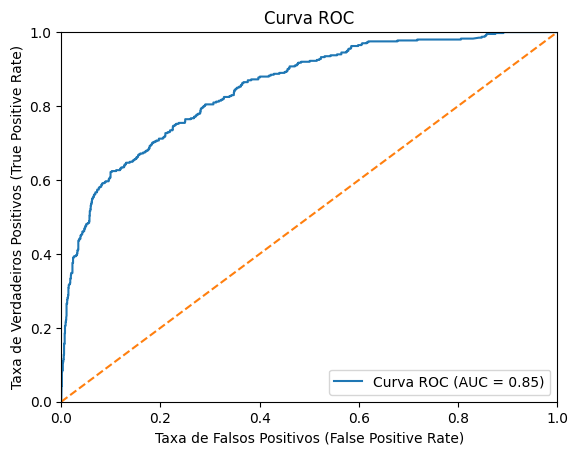

In [42]:
# Imprimindo o gráico da Curva ROC
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)

plt.figure()
plt.plot(fpr, tpr, label=f'Curva ROC (AUC = {auc_roc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Taxa de Falsos Positivos (False Positive Rate)')
plt.ylabel('Taxa de Verdadeiros Positivos (True Positive Rate)')
plt.title('Curva ROC')
plt.legend(loc='lower right')

plt.show()

<div class="alert alert-block alert-success">

<b>Comentário: </b> <a class="tocSkip"></a>

Muito bom! A curva ROC é uma forma muito boa de validar modelos
</div>

O modelo final possui um valor de *Area Under the Curve* muito bom, de aproximadamente 0.85!

## Tirando a Prova Real

In [43]:
# Tirando as frequências relativas do target.
class_frequency = target_test.value_counts(normalize=True)
print(class_frequency)

0.0    0.8005
1.0    0.1995
Name: Exited, dtype: float64


In [44]:
# Tirando as frequências relativas do modelo treinado.
predicted_test = pd.Series(model.predict(features_test))

model_frequency = predicted_test.value_counts(normalize=True)
print(model_frequency)

0.0    0.7935
1.0    0.2065
dtype: float64


As frequências relativas de cada Classe de predições do modelo são compatíveis com as originais, o modelo funciona corretamente!

## Conclusão

O objetivo deste projeto foi desenvolver um modelo de machine learning para o banco *BetaBank*, para prever os clientes com possibilidade de deixaro banco, com F1-Score mínimo de 0,56 no conjunto de testes. Após analisar os dados e testar diferentes algoritmos de classificação, consegui atingir essa meta com sucesso.

### Resultados dos Modelos

**Árvores de Decisão:**
- F1-Score sem correção do desequilíbrio de clases: **0.558**
- F1-Score com as classes equilibradas: **0.579**
- F1-Score apenas com aplicação de Upsample: **0.586**

**Floresta Aleatória:**
- F1-Score sem correção do desequilíbrio de clases: **0.570**
- F1-Score com as classes equilibradas: **0.570**
- F1-Score apenas com aplicação de Upsample: **0.627**

**Regressão Logística:**
- F1-Score sem correção do desequilíbrio de clases: **0.300**
- F1-Score com as classes equilibradas: **0.488**
- F1-Score apenas com aplicação de Upsample: **0.493**

### Escolha do Melhor Modelo

Dentre os modelos testados, o modelo de *Floresta Aleatória* apresentou o melhor desempenho, com F1-Score de **0.627**. Além disso, mostrou-se consistente e estável, com *Area Under The Curve* de **0.85** e com previsões nas mesmas proporções das dos dados fornecidos.

### Considerações Finais

Com base nos resultados obtidos, recomendo o uso do modelo de **Floresta Aleatória** para recomendar o plano ideal para os clientes da Megaline. Este modelo não apenas atingiu o objetivo de F1-Score mínim, como também mostrou ser estável e capaz de generalizar para novos dados, o que é crucial para o sucesso da aplicação em um ambiente real.

#### Hiperparâmetros do modelo recomendado:

- `RandomForestClassifier`;
- `n_estimators` = 25;
- `criterion` = 'entropy';
- `max_depth` = 18;
- `min_samples_split` = 2;
- `min_samples_leaf` = 4;
- `class_weight` = 'balanced';
- `random_state` = 3333.